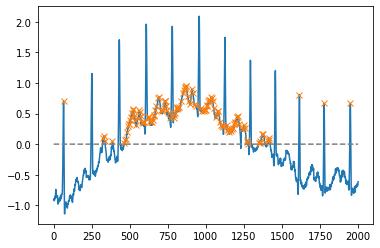

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks, find_peaks_cwt

x = electrocardiogram()[2000:4000]
peaks, _ = find_peaks(x, height=(0,1))

plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

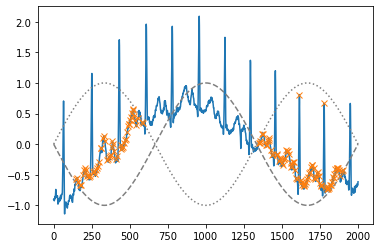

In [4]:
border = np.sin(np.linspace(0, 3 * np.pi, x.size))
peaks, _ = find_peaks(x, height=(-border, border))

plt.plot(x)
plt.plot(-border, "--", color="gray")
plt.plot(border, ":", color="gray")
plt.plot(peaks, x[peaks], "x")
plt.show()

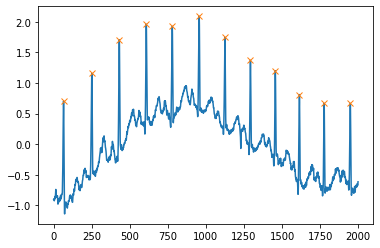

In [5]:
peaks, _ = find_peaks(x, distance=150)
np.diff(peaks)

plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

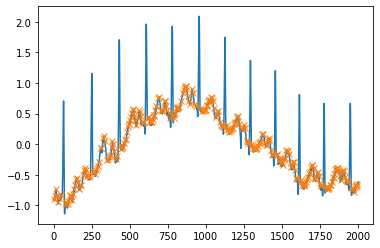

In [6]:
peaks, properties = find_peaks(x, prominence=(None, 0.6))
properties["prominences"].max()

plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

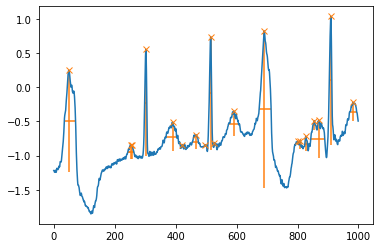

In [7]:
x = electrocardiogram()[17000:18000]
peaks, properties = find_peaks(x, prominence=0, width=5)
properties["prominences"], properties["widths"]


plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
           ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
           xmax=properties["right_ips"], color = "C1")
plt.show()

/home/seneryilmaz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/home/seneryilmaz/anaconda3/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:73: RuntimeWarning: invalid value encountered in greater
  results &= comparator(main, plus)
/home/seneryilmaz/anaconda3/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:74: RuntimeWarning: invalid value encountered in greater
  results &= comparator(main, minus)


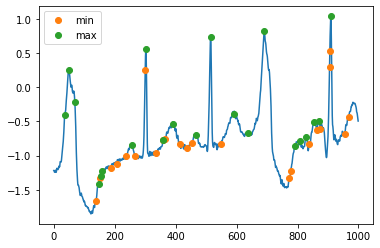

In [47]:
# example data with some peaks:
x = electrocardiogram()[17000:18000]

# maxima : use builtin function to find (max) peaks
max_peakind = find_peaks_cwt(x, np.arange(1,10), gap_thresh=5, 
                             noise_perc=0.10)

# inverse  (in order to find minima)
inv_data = 1/x
# minima : use builtin function fo find (min) peaks (use inversed data)
min_peakind = find_peaks_cwt(inv_data, np.arange(1,10), 
                             gap_thresh=5, noise_perc=0.10)

# graphical output...
# from pylab import *
plt.plot(x)
plt.plot(min_peakind, x[min_peakind], "o", label="min")
plt.plot(max_peakind, x[max_peakind], "o", label="max")
plt.legend()
plt.show()